# PARTE 1

In [22]:
import math
import random

# Constantes globais do módulo
RAIO = 1.0
DIAMETRO = 2.0

def calcular_pi_arquimedes(num_iteracoes):
    """
    Calcula Pi usando o método simplificado de Arquimedes (polígono inscrito).

    Args:
        num_iteracoes (int): O número de vezes para dobrar os lados,
                             começando de um hexágono (6 lados).
    Retorna:
        float: O valor estimado de Pi.
    """
    num_lados = 6
    comp_lado = 1.0     # O comprimento inicial do lado de um hexágono inscrito com R=1 é L=1

    for _ in range(num_iteracoes):
        # Fórmulas derivadas da descrição do problema: a = sqrt(R^2 - (L/2)^2), b = R - a = 1 - a, L_novo = sqrt(b^2 + (L/2)^2)
        a = math.sqrt(RAIO**2 - (comp_lado / 2)**2)
        b = RAIO - a
        comp_lado = math.sqrt(b**2 + (comp_lado / 2)**2)
        num_lados *= 2

    # Pi = (N_lados * L) / (2 * R)
    pi_estimado = (num_lados * comp_lado) / DIAMETRO
    return pi_estimado

def calcular_pi_monte_carlo(num_pontos):
    """
    Calcula Pi usando o método de Monte Carlo.

    Args:
        num_pontos (int): O número total de pontos aleatórios a gerar.
    Retorna:
        float: O valor estimado de Pi.
        Pontos de dados (x, y, dentro) para plotagem.
    """
    dentro_circulo = 0
    dados_pontos = {'x': [], 'y': [], 'dentro': []}

    # Usando um quadrado de -R a R em ambos os eixos x e y
    for _ in range(num_pontos):
        x = random.uniform(-RAIO, RAIO)
        y = random.uniform(-RAIO, RAIO)

        # Verificando se o ponto está dentro do círculo: x^2 + y^2 <= R^2
        if x**2 + y**2 <= RAIO**2:
            dentro_circulo += 1
            esta_dentro = True
        else:
            esta_dentro = False

        dados_pontos['x'].append(x)
        dados_pontos['y'].append(y)
        dados_pontos['dentro'].append(esta_dentro)

    # Razão das áreas = (Pontos Dentro) / (Total de Pontos)
    pi_estimado = 4 * dentro_circulo / num_pontos

    return pi_estimado, dados_pontos

# Hora de la verdad
if __name__ == "__main__":

    print("Testando o módulo estimador_pi_modulo.py:")

    # Teste Arquimedes
    pi_arch = calcular_pi_arquimedes(num_iteracoes=8)
    print(f"Pi (Arquimedes, 8 iterações): {pi_arch:.6f}")

    # Teste Monte Carlo
    pi_mc, _ = calcular_pi_monte_carlo(num_pontos=10000)
    print(f"Pi (Monte Carlo, 10k pontos): {pi_mc:.6f}")

Testando o módulo estimador_pi_modulo.py:
Pi (Arquimedes, 8 iterações): 3.141590
Pi (Monte Carlo, 10k pontos): 3.141600


# PARTE 2

--- Método de Arquimedes ---
Polígono de 12 lados: $\pi \approx 3.10582854$ (Erro: 3.58e-02)
Polígono de 24 lados: $\pi \approx 3.13262861$ (Erro: 8.96e-03)
Polígono de 48 lados: $\pi \approx 3.13935020$ (Erro: 2.24e-03)
Polígono de 96 lados: $\pi \approx 3.14103195$ (Erro: 5.61e-04)
Polígono de 192 lados: $\pi \approx 3.14145247$ (Erro: 1.40e-04)
Polígono de 384 lados: $\pi \approx 3.14155761$ (Erro: 3.50e-05)
Polígono de 768 lados: $\pi \approx 3.14158389$ (Erro: 8.76e-06)
Polígono de 1536 lados: $\pi \approx 3.14159046$ (Erro: 2.19e-06)
Polígono de 3072 lados: $\pi \approx 3.14159211$ (Erro: 5.48e-07)
Polígono de 6144 lados: $\pi \approx 3.14159252$ (Erro: 1.37e-07)
Valor real de $\pi$: 3.141592653589793

--- Método de Monte Carlo ---
Estimativa visual ($\pi \approx 3.1180$ com 2000 pontos)


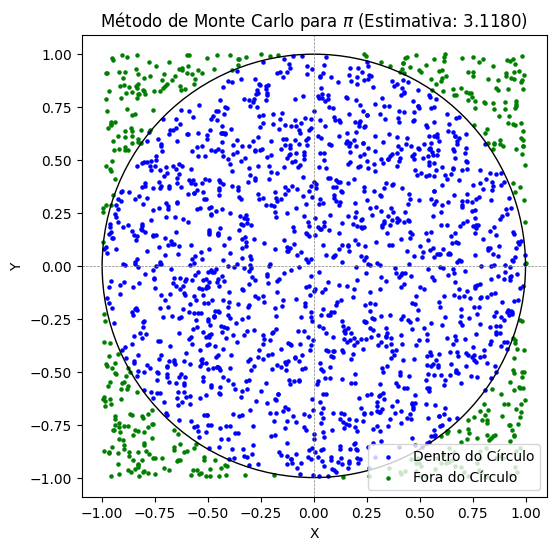


Realizando múltiplas simulações para análise estatística...


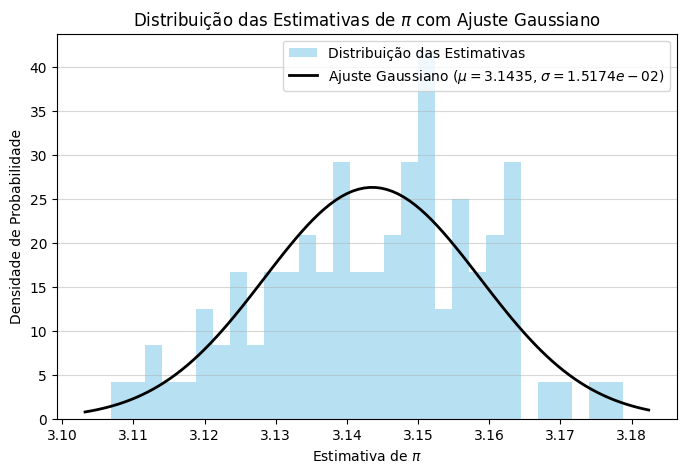


--- Análise Estatística do Ajuste ---
Estimativa final de $\pi$ (média $\mu$): 3.143536
Desvio padrão ($\sigma$): 1.517426e-02
Representação: $\pi \approx 3.143536 \pm 1.517426e-02$


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

# Importa o módulo que criamos
import pi_estimator_module

def plot_monte_carlo_darts(data_points, pi_estimate):
    """Gera o gráfico de dispersão dos pontos de Monte Carlo."""
    x = np.array(data_points['x'])
    y = np.array(data_points['y'])
    inside = np.array(data_points['dentro'])    # Acessa a lista armazenada para calcular_pi_monte_carlo.

    plt.figure(figsize=(6, 6))

    # Plota os pontos dentro e fora do circulo
    plt.scatter(x[inside], y[inside], color='blue', s=5, label='Dentro do Círculo')
    plt.scatter(x[~inside], y[~inside], color='green', s=5, label='Fora do Círculo')

    # Desenhe o limite do círculo
    circulo = plt.Circle((0, 0), pi_estimator_module.RAIO, color='black', fill=False)
    plt.gca().add_artist(circulo)

    # Legendas
    plt.title(f'Método de Monte Carlo para $\\pi$ (Estimativa: {pi_estimate:.4f})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.axis('equal')
    plt.show()

def plot_pi_distribution_and_fit(estimates):
    """
    Gera um histograma das estimativas de Pi e ajusta uma curva Gaussiana.
    """
    estimates_np = np.array(estimates)

    # Cria o histograma
    plt.figure(figsize=(8, 5))
    hist, bins, _ = plt.hist(estimates_np, bins=30, density=True, alpha=0.6, color='skyblue', label='Distribuição das Estimativas')

    # Ajusta uma Gaussiana para os dados
    mu, sigma = norm.fit(estimates_np)

    # Cria um ajuste da curva
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)

    #Sequencia de plots
    plt.plot(x, p, 'k', linewidth=2, label=f'Ajuste Gaussiano ($\\mu={mu:.4f}$, $\\sigma={sigma:.4e}$)')
    plt.title('Distribuição das Estimativas de $\\pi$ com Ajuste Gaussiano')
    plt.xlabel('Estimativa de $\\pi$')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True, axis='y', alpha=0.5)
    plt.show()

    return mu, sigma

# Executando o programa principal

if __name__ == '__main__':

    # /////////////////////////////////////////////////////
    # Método 1: Arquimedes
    # /////////////////////////////////////////////////////

    print("--- Método de Arquimedes ---")

    iterations_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    results_arch = {}

    for iterations in iterations_list:
        pi_est = pi_estimator_module.calcular_pi_arquimedes(iterations)
        num_sides = 6 * (2**iterations)
        results_arch[num_sides] = pi_est
        print(f"Polígono de {num_sides} lados: $\\pi \\approx {pi_est:.8f}$ (Erro: {abs(math.pi - pi_est):.2e})")

    print(f"Valor real de $\\pi$: {math.pi}")

    # /////////////////////////////////////////////////////
    # Método 2: Monte Carlo
    # /////////////////////////////////////////////////////

    print("\n" + "="*40)
    print("--- Método de Monte Carlo ---")

    NUM_POINTS_VISUAL = 2000
    NUM_RUNS_STATS = 100
    POINTS_PER_RUN = 10000

    # Construindo a visualização Gráfica
    pi_mc_visual, data_points = pi_estimator_module.calcular_pi_monte_carlo(NUM_POINTS_VISUAL)
    print(f"Estimativa visual ($\\pi \\approx {pi_mc_visual:.4f}$ com {NUM_POINTS_VISUAL} pontos)")
    plot_monte_carlo_darts(data_points, pi_mc_visual)

    # Executando a análise estatística e o ajuste gaussiano
    print("\nRealizando múltiplas simulações para análise estatística...")
    estimates_list = []
    for _ in range(NUM_RUNS_STATS):
        pi_est_run, _ = pi_estimator_module.calcular_pi_monte_carlo(POINTS_PER_RUN)
        estimates_list.append(pi_est_run)

    mu, sigma = plot_pi_distribution_and_fit(estimates_list)

    #Mostrando os valores de saida
    print("\n--- Análise Estatística do Ajuste ---")
    print(f"Estimativa final de $\\pi$ (média $\\mu$): {mu:.6f}")
    print(f"Desvio padrão ($\\sigma$): {sigma:.6e}")
    print(f"Representação: $\\pi \\approx {mu:.6f} \\pm {sigma:.6e}$")